In [1]:
import pandas as pd

df = pd.read_csv('./pokemon/pokemon.csv')
df.head(4)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN


In [2]:
!pip install opencv-python

  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)


In [4]:
!pip install matplotlib

     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/159.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 159.4/159.4 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   -------------------------- ------------- 4.9/7.5 MB 104.8 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 94.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/477.9 kB ? eta -:--:--
   --------------------------------------- 477.9/477.9 kB 31.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 99.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
   ---------------------------------------- 56.2/56.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------

In [5]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [6]:
image_folder_path = './pokemon/images/images'
image_files = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

In [7]:
# VGG16 모델 불러오기
vgg16_model = VGG16(weights='imagenet', include_top=False)

1/1 [==============================] - 0s 121ms/step


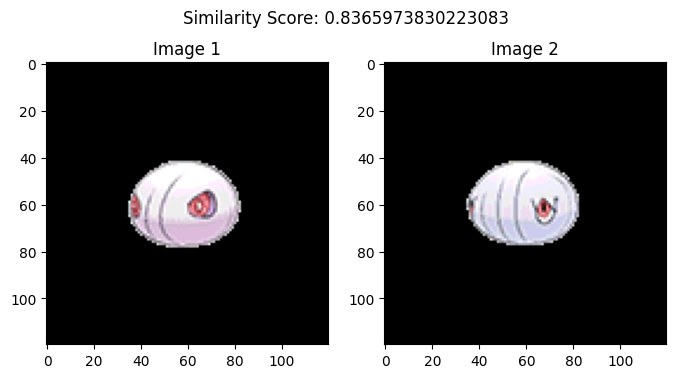

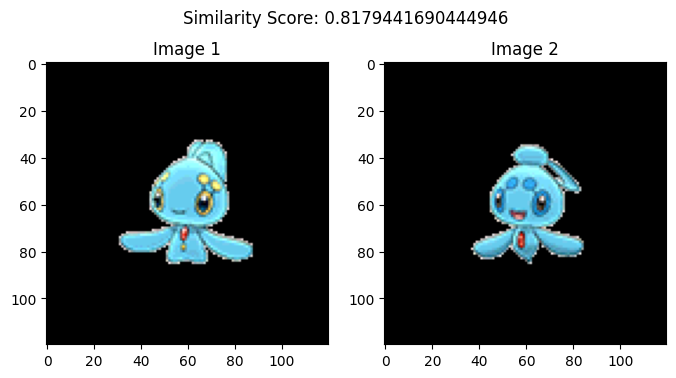

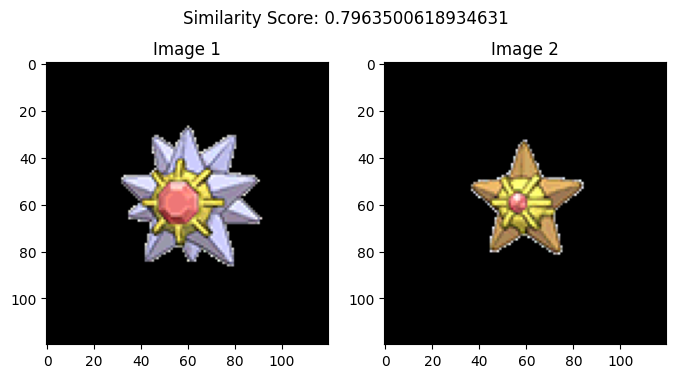

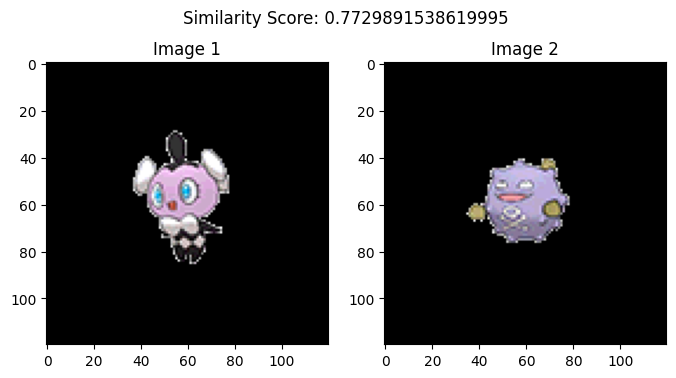

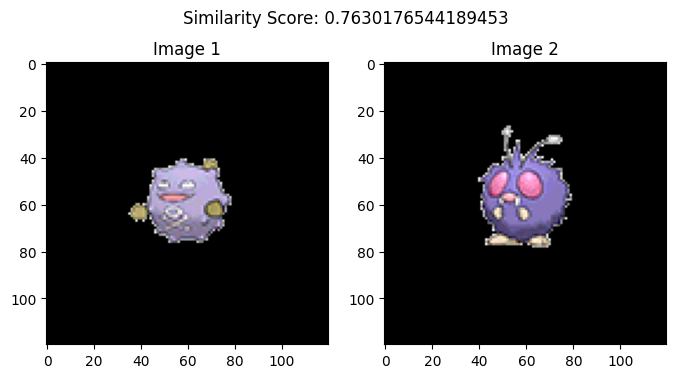

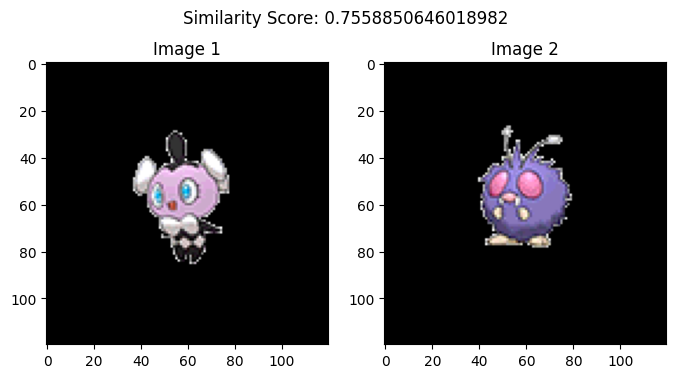

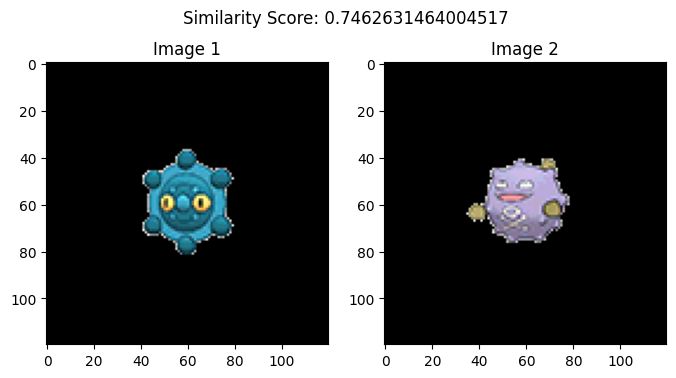

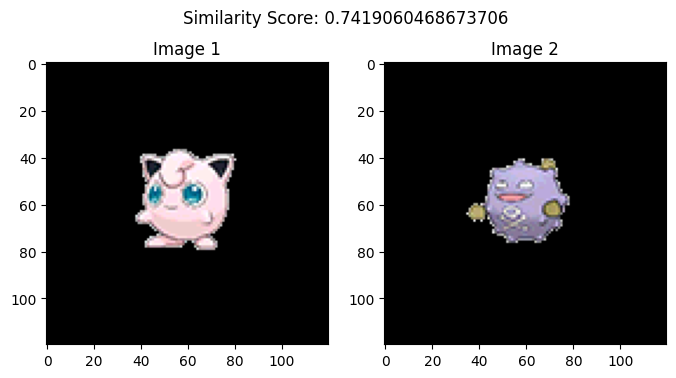

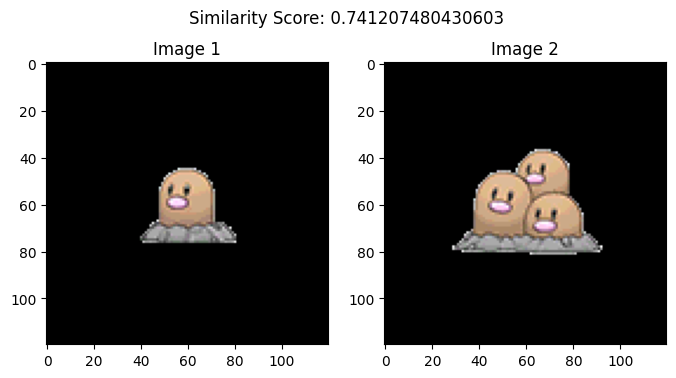

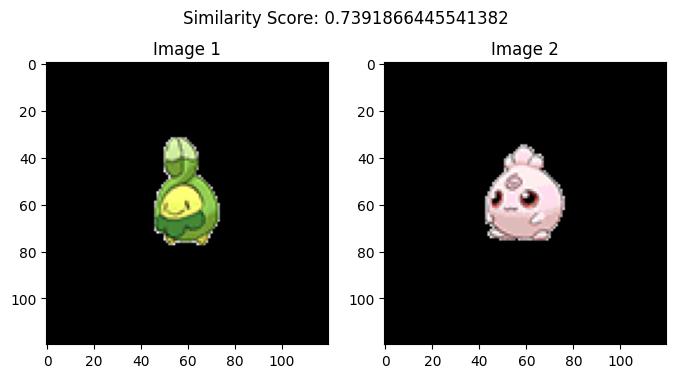

In [8]:
def calculate_cosine_similarity(feature_vector1, feature_vector2):
    # 코사인 유사도 계산
    similarity = cosine_similarity([feature_vector1], [feature_vector2])
    return similarity[0][0]

# 이미지 간 유사도 계산 함수 정의
def calculate_similarity_between_images(image_files, model):
    features_list = []
    similarity_scores = []
    
    # 이미지 특징 추출
    for image_path in image_files:
        # 이미지 전처리 및 특징 추출
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)
        features = model.predict(img)
        features_list.append(features.flatten())

    # 이미지 간 유사도 계산 및 출력
    for i in range(len(features_list)):
        for j in range(i + 1, len(features_list)):
            features1 = features_list[i]
            features2 = features_list[j]
            similarity_score = calculate_cosine_similarity(features1, features2)
            
            # 이미지 페어와 유사도를 저장
            similarity_scores.append((i, j, similarity_score))

    # 유사도가 높은 순으로 정렬
    similarity_scores.sort(key=lambda x: x[2], reverse=True)

    # 상위 10개 이미지 페어 출력
    for pair in similarity_scores[:10]:
        i, j, similarity_score = pair

        img1 = cv2.imread(image_files[i])
        img2 = cv2.imread(image_files[j])

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        plt.title('Image 1')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.title('Image 2')

        plt.suptitle(f"Similarity Score: {similarity_score}")
        plt.show()

# 이미지 간 유사도 계산 및 출력
calculate_similarity_between_images(image_files, vgg16_model)